In [283]:
import numpy as np
def sigmoid(x, der=False):
    return sigmoid(x) * (1.0 - sigmoid(x)) if der else 1 / (1 + np.exp(-x))
def simpleerror(actual, predicted):
    return actual - predicted

In [402]:
class NN():
    def __init__(self, insize = 2, outsize = 1, layers=[3, 5], activation=sigmoid, error_func=simpleerror, learning_rate = 0.3):
        self.activation = activation
        self.layers = [insize] + layers + [outsize]
        self.params = []
        self.learning_rate = learning_rate
        self.error_func = error_func
        np.random.seed(0)
        self.values = []
        #
        #  x     x y C     1a
        #  y  .  x y C  =  1b
        #        x y C     1c
        #
        #  1a    1a 1b 1c CC
        #  1b .  
        #  1c
        #
        for i in range(1, len(self.layers)):
            # Each transformation takes the vector of size previous layer to the next layer size.
            # However we also need to add a constant at each layer
            # Rather than doing this seperately, if we extend the previous layer by 1 element (with the value 1)
            # Then we can perform a matrix multiplication to map to the next layer size
            self.params.append(np.random.random((self.layers[i - 1] + 1, self.layers[i])) - 0.5)
            
#             if i == len(self.layers) - 1:
#                 # The last layer has no bias parameter
#                 self.params.append(np.random.random((self.layers[i - 1] + 1 , self.layers[i])) - 0.5)
#             else:
#                 # Each layer maps from the previous layers parameters (plue one for bias) to the next ()
#                 self.params.append(np.random.random((self.layers[i - 1] + 1, self.layers[i] + 1)) - 0.5)
            
    def forward(self, x):
        # We build an array of the values at each layer
        # This will be the same size as the layers
        # Start with the input
        self.values = [np.array(x)]
        for i, p in enumerate(self.params):
            # Create the next layer by dot product with the parameter matrix
            # Note we add the constant 1, as the parameter matrix contains a constant
            output = np.dot(np.append(self.values[i], 1), p)
            # Run the activation function to map these values
            act = self.activation(output)
            # Then add to the runnning values total
            self.values.append(act)
            
        # We return the output, which is the last layer
        return self.values[-1]
        
    def train(self, x, y):
        # The input vector must be the same size as the first matrix (minus the constant)
        assert(len(x) == self.params[0].shape[0] - 1)
        # The output sizes should match
        assert(len(y) == self.params[-1].shape[1])
        
        # Get the output
        res = self.forward(x)
        
        # Calculate the error
        error = self.error_func(y, self.values[-1])
        
        # Start building the errors
        # We start by taking the error, and back propagating through the activation function
        self.errors = [error * self.activation(self.values[-1], True)]

        # Then we 
        last = True
        for l in range(len(self.values) - 2, -1, -1):
            # Take the previous error, and backprop through the parameter matrix
            # We take the transverse matrix here to invert the operation
            # We then drop the last value, as this is the 1 that we appending in the forward model
            if l == len(self.values) - 2:
                back_prop_errors = self.errors[-1].dot(self.params[l].T)
            else:
                back_prop_errors = self.errors[-1][:-1].dot(self.params[l].T)
            
            # Apply the activation function deriviative to pass back to the next layer
            # Remember the implicit 1 value at each layer
            #self.errors.append(back_prop_errors * self.activation(self.values[l], True))
            self.errors.append(back_prop_errors * np.append(self.activation(self.values[l], True),1))
            
        self.errors.reverse()
        print('errors %s' % [e.shape for e in self.errors])
        for i in range(len(self.params)):
            layer = np.atleast_2d(np.append(self.values[i], 1))
            error = np.atleast_2d(self.errors[i])
            print(layer)
            print(error)
            print(i)
            print(layer.shape)
            print(error.shape)
            print(layer.T.dot(error).shape)
            print(self.params[i].shape)
            self.params[i] += self.learning_rate * layer.T.dot(error)

In [403]:
nn = NN()
nn.forward([2, 2])
print("params %s" % [p.shape for p in nn.params])
print("vakues %s" % [p.shape for p in nn.values])
nn.train([2, 2], [0.9])

params [(3, 3), (4, 5), (6, 1)]
vakues [(2,), (3,), (5,), (1,)]
errors [(3,), (4,), (6,), (1,)]
[[2 2 1]]
[[ -3.28829145e-06  -4.77233593e-06  -1.02023150e-04]]
0
(1, 3)
(1, 3)
(3, 3)
(3, 3)
[[ 0.53120454  0.66138253  0.72331752  1.        ]]
[[ -1.66057744e-04   1.32106907e-05  -2.53552535e-04  -3.49186181e-03]]
1
(1, 4)
(1, 4)
(4, 4)
(4, 5)


ValueError: operands could not be broadcast together with shapes (4,5) (4,4) (4,5) 

In [372]:
nn = NN()
print([p.shape for p in nn.params])
print(nn.layers)
print(nn.forward(np.array([2, 2])))
print([p.shape for p in nn.values])

print('---')
print(nn.layers)
print(nn.forward(np.array([2, 2])))
print([p.shape for p in nn.values])


[(3, 3), (4, 5), (6, 1)]
[2, 3, 5, 1]
[ 0.3704215]
[(2,), (3,), (5,), (1,)]
---
[2, 3, 5, 1]
[ 0.3704215]
[(2,), (3,), (5,), (1,)]


In [220]:
letters = 'hello hello hello'
possible = list(set(letters))
possible

['h', ' ', 'l', 'o', 'e']

In [221]:
from sklearn.datasets import make_blobs

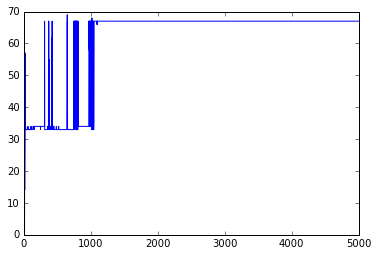

In [272]:
data, labels = make_blobs()
import random
import matplotlib.pyplot as plt
%matplotlib inline
nn = NN(outsize=3)

def accuracy(nn, data, label):
    return sum([np.argmax(nn.forward(d)) == l for d, l in zip(data, label)]) * 100. / len(data)

err = []
for i in range(5000):
    i = random.randint(0, len(data) - 1)
    lprob = np.array([1. if j == labels[i] else 0. for j in range(3)])
    nn.train(data[i], lprob)
    err.append(accuracy(nn, data, labels))
plt.plot(err)
plt.show()

In [282]:
for i in range(50):
    out = []
    for j in range(50):
        out.append(np.argmax(nn.forward(np.array([i*20/50. - 10., j*20./50. - 10.]))))
    print(' '.join(("%s" % i for i in out)))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [280]:
data

array([[ -6.39862121,  -7.55846418],
       [ -5.94496305,  -4.76765649],
       [ -5.71211416,  -4.20477745],
       [ -0.88524313,   6.05577782],
       [ -6.26274226,  -5.86106999],
       [ -8.41022279,   7.57836476],
       [ -3.17515249,   6.94099034],
       [ -6.6317687 ,  -7.811411  ],
       [ -8.20040433,  -8.05913159],
       [ -7.58996883,  -6.80910024],
       [ -7.82939247,   6.50123439],
       [ -9.14700892,   7.74301544],
       [ -7.6547888 ,   6.0748389 ],
       [ -3.55365577,   7.91058651],
       [ -2.43263572,   5.99899978],
       [ -2.42999725,   5.94826026],
       [ -6.20552503,  -7.34534175],
       [ -4.38753547,   6.13124138],
       [ -2.20108413,   7.50917364],
       [ -8.53023289,   5.24553711],
       [ -8.68187655,  -5.69119216],
       [ -2.54278665,   5.12880614],
       [ -7.60067528,  -6.74713016],
       [ -8.75736931,   7.67260396],
       [ -5.76035114,  -5.42157267],
       [ -3.40284324,   7.53580305],
       [ -6.29878213,  -6.32296086],
 